In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
%matplotlib inline

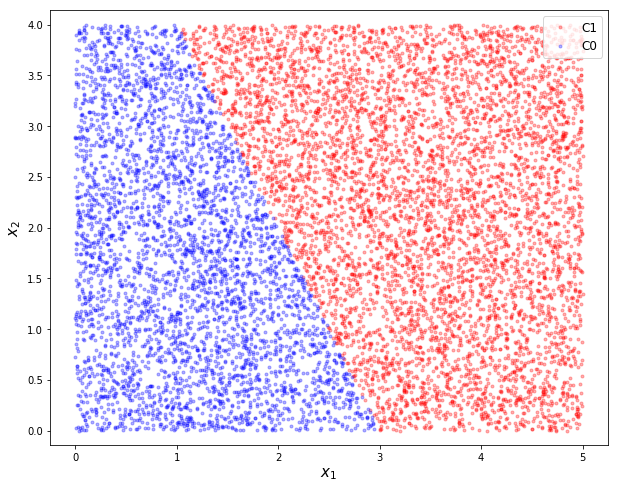

In [2]:

# datat generation

m = 10000
true_w = np.array([[-6], [2], [1]])
train_X = np.hstack([np.ones([m,1]), 5*np.random.rand(m,1), 4*np.random.rand(m,1)])

true_w = np.asmatrix(true_w)
train_X = np.asmatrix(train_X)

train_y = 1/(1 + np.exp(-train_X*true_w)) > 0.5 

C1 = np.where(train_y == True)[0]
C0 = np.where(train_y == False)[0]

train_y = np.empty([m,1])
train_y[C1] = 1
train_y[C0] = 0

plt.figure(figsize = (10,8))
plt.plot(train_X[C1,1], train_X[C1,2], 'r.', alpha = 0.3, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'b.', alpha = 0.3, label = 'C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
# plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

In [10]:
lr=0.05
n_iter=60000
n_prt=250
n=train_X.shape[0]

x=tf.placeholder(tf.float32,[None,3])
y=tf.placeholder(tf.float32,[None,1])

w=tf.Variable(tf.random_normal([3,1],stddev=0.1),dtype=tf.float32)
pred=tf.matmul(x,w)
loss=tf.nn.sigmoid_cross_entropy_with_logits(logits=pred,labels=y)
loss=tf.reduce_mean(loss)

opt=tf.train.GradientDescentOptimizer(lr).minimize(loss)

init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

record=[]
for i in range(n_iter):
    idx=np.random.choice(m,1)
    

    sample_x,sample_y=train_X[idx,:],train_y[idx,:]

    _,l=sess.run([opt,loss],feed_dict={x:sample_x,y:sample_y})
    
    if i%n_prt==0:
        record.append(l)
        
    

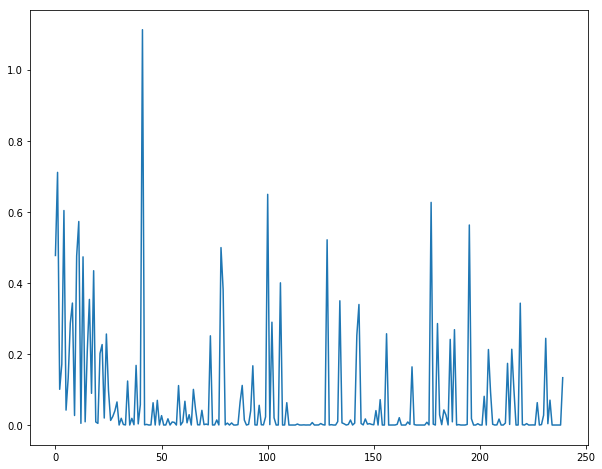

In [12]:
plt.figure(figsize=(10,8))
plt.plot(record)
plt.show()

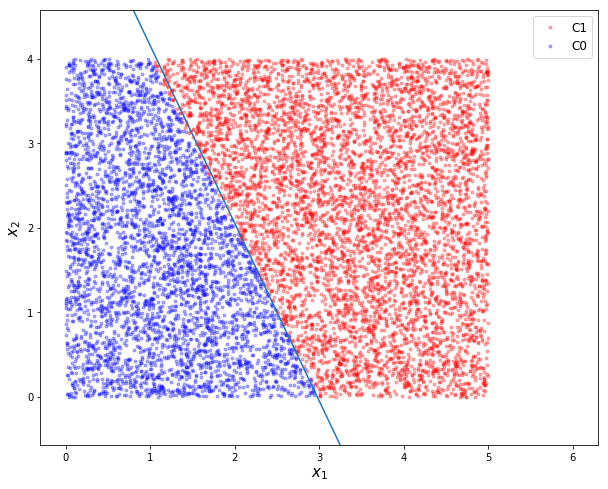

In [14]:
res=sess.run(w)
xp=np.linspace(0,6,300)
yp=-res[1,0]/res[2,0]*xp-res[0,0]/res[2,0]
plt.figure(figsize = (10,8))
plt.plot(train_X[C1,1], train_X[C1,2], 'r.', alpha = 0.3, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'b.', alpha = 0.3, label = 'C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.plot(xp,yp)
# plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

In [15]:
lr=0.05
n_iter=60000
n_prt=250
n_batch=50
n=train_X.shape[0]

x=tf.placeholder(tf.float32,[None,3])
y=tf.placeholder(tf.float32,[None,1])

w=tf.Variable(tf.random_normal([3,1],stddev=0.1),dtype=tf.float32)
pred=tf.matmul(x,w)
loss=tf.nn.sigmoid_cross_entropy_with_logits(logits=pred,labels=y)
loss=tf.reduce_mean(loss)

opt=tf.train.GradientDescentOptimizer(lr).minimize(loss)

init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

record=[]
for i in range(n_iter):
    idx=np.random.choice(m,50)
    

    sample_x,sample_y=train_X[idx,:],train_y[idx,:]

    _,l=sess.run([opt,loss],feed_dict={x:sample_x,y:sample_y})
    
    if i%n_prt==0:
        record.append(l)


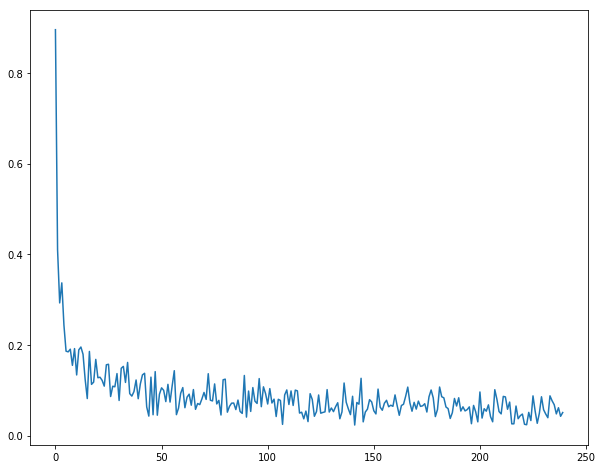

In [16]:
plt.figure(figsize=(10,8))
plt.plot(record)
plt.show()

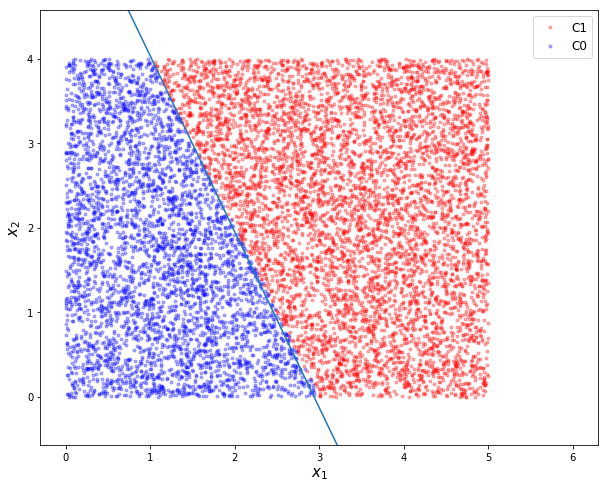

In [17]:
res=sess.run(w)
xp=np.linspace(0,6,300)
yp=-res[1,0]/res[2,0]*xp-res[0,0]/res[2,0]
plt.figure(figsize = (10,8))
plt.plot(train_X[C1,1], train_X[C1,2], 'r.', alpha = 0.3, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'b.', alpha = 0.3, label = 'C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.plot(xp,yp)
# plt.xlim([0,4])
plt.ylim([0,4])
plt.show()